<a href="https://colab.research.google.com/github/Sakshi3071/Sakshi_Satre_INBT02267_JULY23-Data-Scienece-Internship/blob/main/iNeuBytes_Data_Science_Major_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title** : Predictive Analysis and Customer Segmentation for an E-Commerce Platform

In [ ]:
#Importing Nesessary Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("/content/data.csv",encoding='latin-1')


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom




---

# **Data Cleaning and Preprocessing**

---



In [ ]:
#shape of data
print("data.shape :",data.shape)

data.shape : (541909, 8)


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Display the list of column names
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')



---

# **Exploratory Data Analysis (EDA)**

---



In [ ]:
# Calculate the number of unique invoices
unique_invoices = data['InvoiceDate'].nunique()
print("Number of Unique Invoices:", unique_invoices)

Number of Unique Invoices: 23260


In [ ]:
# Calculate the total number of transactions
total_transactions = len(data)
print("Total Number of Transactions:", total_transactions)

Total Number of Transactions: 541909


In [ ]:
# Calculate the total revenue
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
total_revenue = data['TotalRevenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 9747747.933999998


In [ ]:
# Identify the most popular products
popular_products = data['Description'].value_counts().head(10)
print("Most Popular Products:")
print(popular_products)

Most Popular Products:
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64


In [ ]:
# Identify the top countries by transaction count
top_countries = data['Country'].value_counts().head(10)
print("Top Countries by Transaction Count:")
print(top_countries)

Top Countries by Transaction Count:
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64


In [ ]:
# Display the initial count of missing values
print("Missing Values Count:")
print(data.isnull().sum())

Missing Values Count:
InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
TotalRevenue         0
dtype: int64


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalRevenue
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
# Handle negative Quantity and UnitPrice values
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
# time series data handling
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Date'] = data['InvoiceDate'].dt.date

data['Day'] = data['InvoiceDate'].dt.day_name()
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['Quarter'] = data['InvoiceDate'].dt.quarter
data['Year'] = data['InvoiceDate'].dt.year
data['Time'] = data['InvoiceDate'].dt.time
data['Hour'] = data['InvoiceDate'].dt.hour

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Date,Day,DayOfWeek,Month,Quarter,Year,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,2,2010-12,4,2010,08:26:00,8


In [ ]:
#Create features that summarize customer behavior, such as total spending per customer, average spending per transaction, or number of transactions.
customer_spending = data.groupby('CustomerID')['TotalRevenue'].sum()
customer_transactions = data.groupby('CustomerID')['InvoiceNo'].nunique()

data = data.merge(customer_spending, on='CustomerID', suffixes=('', '_TotalSpending'))
data = data.merge(customer_transactions, on='CustomerID', suffixes=('', '_NumTransactions'))



---



---



<Axes: xlabel='Month'>

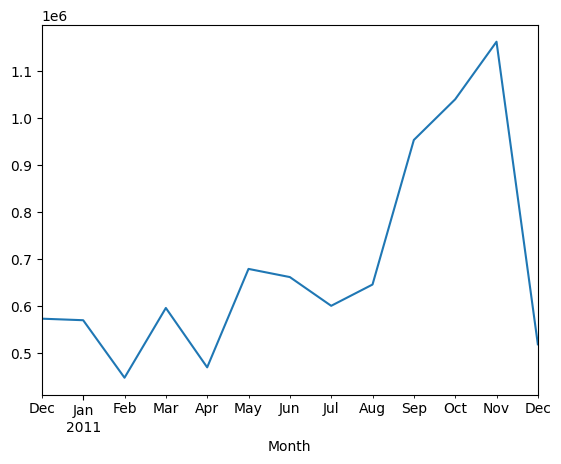

In [ ]:
data.groupby('Month')['TotalRevenue'].sum().plot()

In [ ]:
top10_gmvcountry = data.groupby("Country")['TotalRevenue'].sum().sort_values(ascending=False).head(10).reset_index()
top10_gmvcountry

,Country,TotalRevenue
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


Text(0, 0.5, 'Transaction Value')

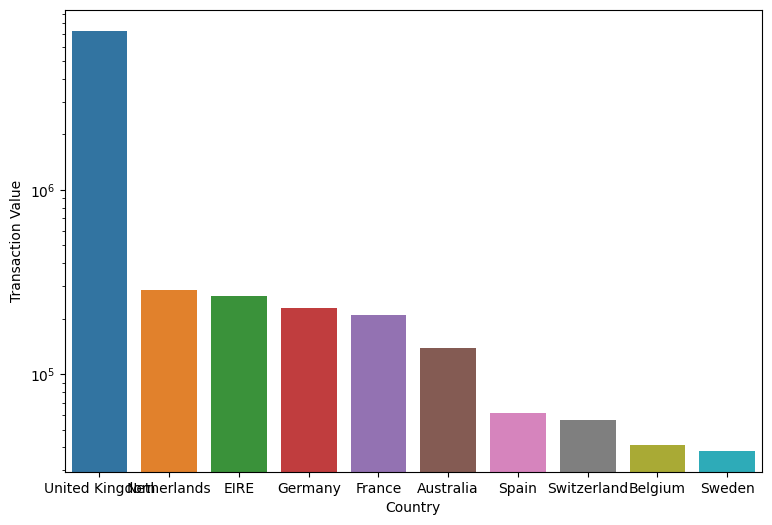

In [ ]:

plt.rcParams['figure.figsize'] = (9,6)
sns.barplot(data=top10_gmvcountry, x="Country", y="TotalRevenue")
plt.yscale("log")

plt.ylabel("Transaction Value")

In [ ]:
top5_producstgmv = data.groupby("Description").agg({"TotalRevenue": "sum"}) \
                    .sort_values(by="TotalRevenue", ascending=False).head(5) \
                    .reset_index() \
                    .rename(columns={"TotalRevenue": "TransactionValue", "Description":"Products"})
top5_producstgmv

,Products,TransactionValue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


<Axes: xlabel='Products', ylabel='TransactionValue'>

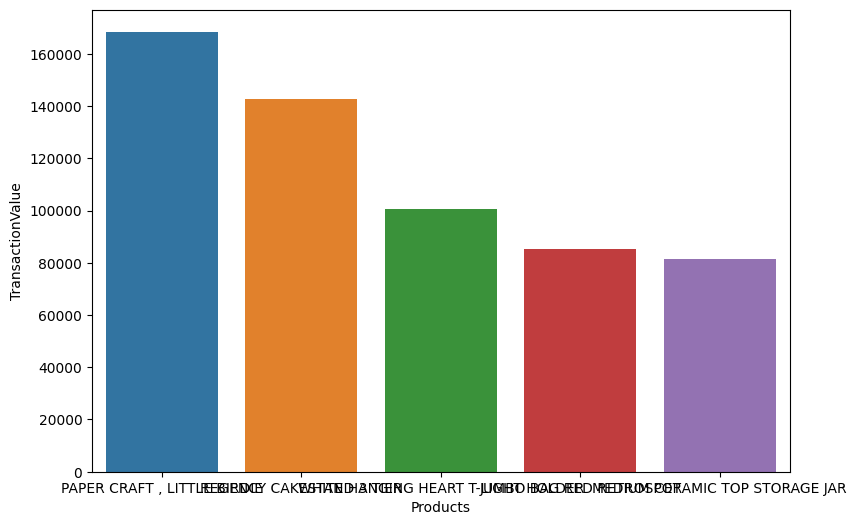

In [ ]:
sns.barplot(data=top5_producstgmv, y="TransactionValue", x="Products")

In [ ]:
data_by_day = data.groupby(["Day", "DayOfWeek"]).agg({"TotalRevenue": "sum", "InvoiceNo":"count"}) \
            .reset_index() \
            .sort_values(by="DayOfWeek") \
            .rename(columns = {"TotalRevenue":"ValueTransaction", "InvoiceNo":"NumberOfOrders"})
data_by_day

,Day,DayOfWeek,ValueTransaction,NumberOfOrders
1,Monday,0,1367146.411,64893
4,Tuesday,1,1700634.631,66473
5,Wednesday,2,1588336.170,68885
3,Thursday,3,1976859.070,80035
0,Friday,4,1485917.401,54825
2,Sunday,6,792514.221,62773


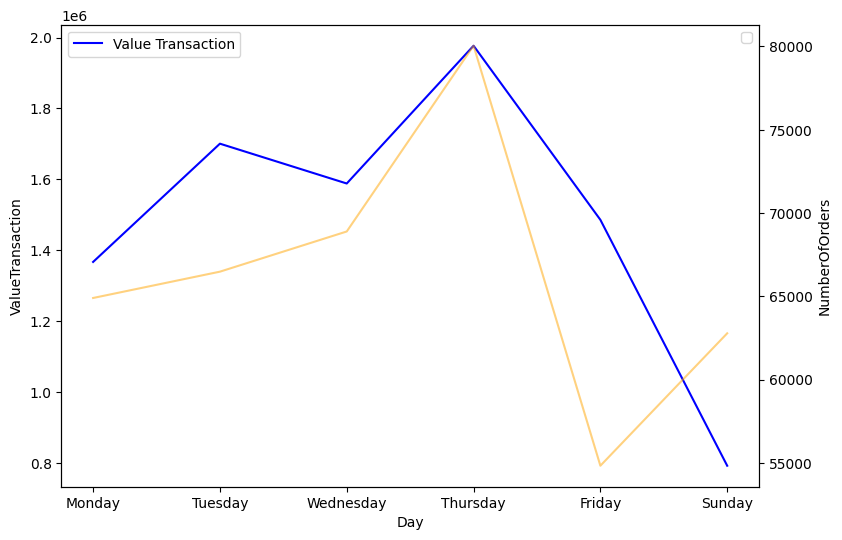

In [ ]:
# plot line graph on axis #1
sns.lineplot(data=data_by_day, x="Day", y="ValueTransaction" ,color='blue')
plt.legend(['Value Transaction'], loc="upper left")
plt.twinx()
# plot bar graph on axis #2
sns.lineplot(data=data_by_day, x="Day", y="NumberOfOrders", color='orange', alpha=0.5)
plt.legend(['NumberOfOrders'], loc="upper right")
plt.legend()
plt.show();



---

# **Model Implementation**

---



In [ ]:
#label encoding

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data['Description'] = lb.fit_transform(data['Description'])
data['Country'] = lb.fit_transform(data['Country'])

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Date', 'Day',
       'DayOfWeek', 'Month', 'Quarter', 'Year', 'Time', 'Hour',
       'TotalRevenue_TotalSpending', 'InvoiceNo_NumTransactions'],
      dtype='object')

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['TotalRevenue_TotalSpending','InvoiceDate','StockCode','Date','Day','DayOfWeek','Month','Quarter','Year','Time','Hour'])
y = data['TotalRevenue_TotalSpending']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)



---


# **Model Evaluation**
---


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE) - Linear Regression:", mae_lr)
print("Mean Absolute Error (MAE) - Decision Tree:", mae_dt)
print("Mean Absolute Error (MAE) - Random Forest:", mae_rf)

print("Mean Squared Error (MSE) - Linear Regression:", mse_lr)
print("Mean Squared Error (MSE) - Decision Tree:", mse_dt)
print("Mean Squared Error (MSE) - Random Forest:", mse_rf)

print("R-squared (R2) - Linear Regression:", r2_lr)
print("R-squared (R2) - Decision Tree:", r2_dt)
print("R-squared (R2) - Random Forest:", r2_rf)


Mean Absolute Error (MAE) - Linear Regression: 8910.737255032942
Mean Absolute Error (MAE) - Decision Tree: 17.328791120833596
Mean Absolute Error (MAE) - Random Forest: 25.34408145879907
Mean Squared Error (MSE) - Linear Regression: 591542614.9842743
Mean Squared Error (MSE) - Decision Tree: 765758.1815645453
Mean Squared Error (MSE) - Random Forest: 756400.9816955639
R-squared (R2) - Linear Regression: 0.4083458386891765
R-squared (R2) - Decision Tree: 0.999234097420534
R-squared (R2) - Random Forest: 0.9992434563848765




---

Overfitting Check

---



In [ ]:
# Decision Tree

y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)


# Calculate metrics
mae_dt_train = mean_absolute_error(y_train, y_pred_dt_train)
mae_dt_test = mean_absolute_error(y_test, y_pred_dt_test)

mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)

r2_dt_train = r2_score(y_train, y_pred_dt_train)
r2_dt_test = r2_score(y_test, y_pred_dt_test)



# Print results
print("Decision Tree:")
print("Train MAE:", mae_dt_train)
print("Validation MAE:", mae_dt_test)
print("-------------------------------------------------------------------")
print("Train MSE:", mse_dt_train)
print("Validation MSE:", mse_dt_test)
print("-------------------------------------------------------------------")
print("Train R-squared:", r2_dt_train)
print("Validation R-squared:", r2_dt_test)

Decision Tree:
Train MAE: 2.855208630662285e-10
Validation MAE: 17.328791120833596
-------------------------------------------------------------------
Train MSE: 1.2752175900828472e-18
Validation MSE: 765758.1815645453
-------------------------------------------------------------------
Train R-squared: 1.0
Validation R-squared: 0.999234097420534


In [ ]:
# Random Forest

y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# Calculate metrics
mae_rf_train = mean_absolute_error(y_train, y_pred_dt_train)
mae_rf_test = mean_absolute_error(y_test, y_pred_dt_test)

mse_rf_train = mean_squared_error(y_train, y_pred_dt_train)
mse_rf_test = mean_squared_error(y_test, y_pred_dt_test)

r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf_test = r2_score(y_test, y_pred_dt_test)

# Print results
print("\nRandom Forest:")
print("Train MAE:", mae_rf_train)
print("Validation MAE:", mae_rf_test)
print("-------------------------------------------------------------------")
print("Train MSE:", mse_rf_train)
print("Validation MSE:", mse_rf_test)
print("-------------------------------------------------------------------")
print("Train R-squared:", r2_rf_train)
print("Validation R-squared:", r2_rf_test)



Random Forest:
Train MAE: 2.855208630662285e-10
Validation MAE: 17.328791120833596
-------------------------------------------------------------------
Train MSE: 1.2752175900828472e-18
Validation MSE: 765758.1815645453
-------------------------------------------------------------------
Train R-squared: 0.9999808580392223
Validation R-squared: 0.999234097420534




---


#**Clustering for Customer Segmentation :**
---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

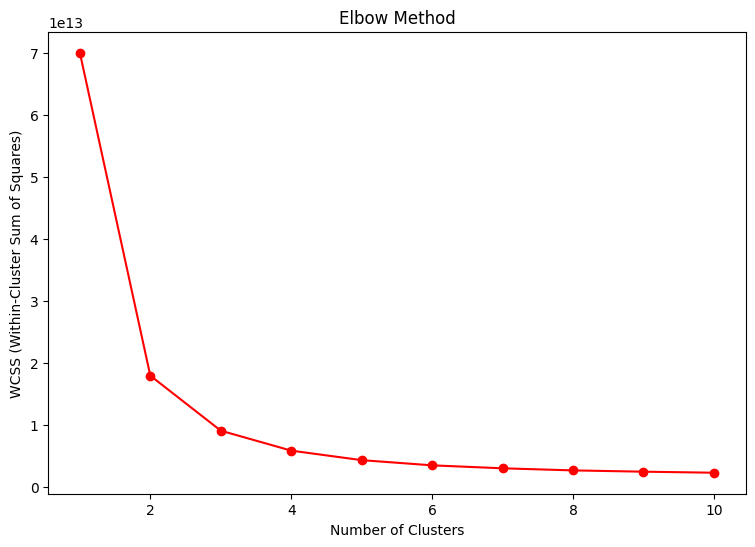

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Meansclustering
X1= data.loc[:,["UnitPrice","Quantity"]].values
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o',color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show();

In [ ]:
kmeans = KMeans(n_clusters=12)
label = kmeans.fit_predict(X1)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 3]


In [ ]:
print(label)

[3 3 3 ... 3 3 3]


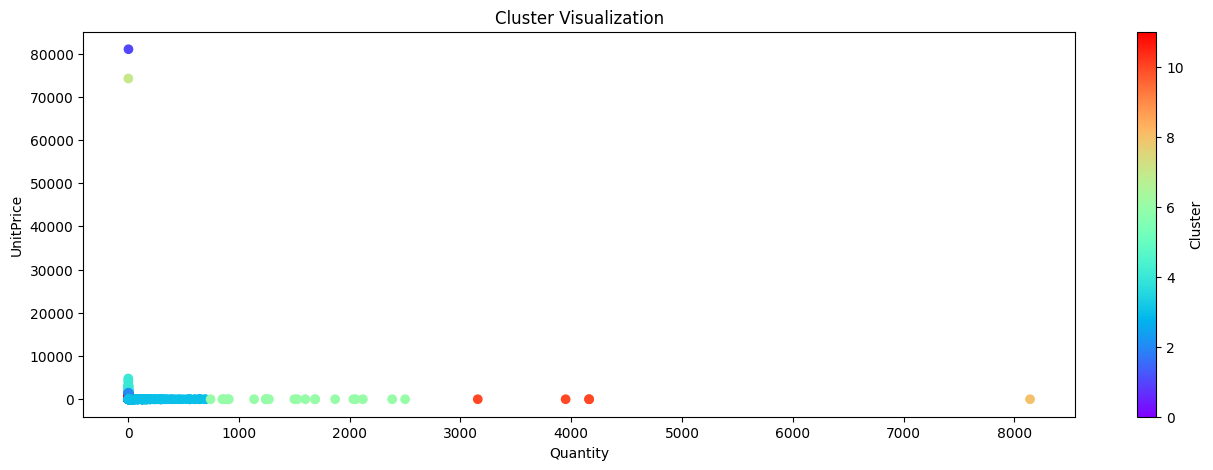

''

In [ ]:
import matplotlib.pyplot as plt

# Select relevant features for clustering
cluster_features = ['InvoiceDate','Quantity','TotalRevenue']

X_cluster = data[cluster_features]

# number of clusters (K)
k = 3

# Initialize K-means model
kmeans = KMeans(n_clusters=12, random_state=42)

# Fit the model and predict clusters
X = data[['Quantity', 'UnitPrice', 'TotalRevenue']]  # Select relevant features


# Visualize the clusters
plt.rcParams['figure.figsize'] = (16,5)
plt.scatter(X['UnitPrice'], X['Quantity'], c =label,cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

;

In [ ]:
data['Cluster'] = label

In [ ]:
selected_features = ['Quantity','UnitPrice']
segmentation_data = data[selected_features]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

In [ ]:
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Assign segment labels to each customer
data['segment'] = kmeans.labels_

Segmentation Results:
0    397866
2        16
1         2
Name: segment, dtype: int64


<Axes: >

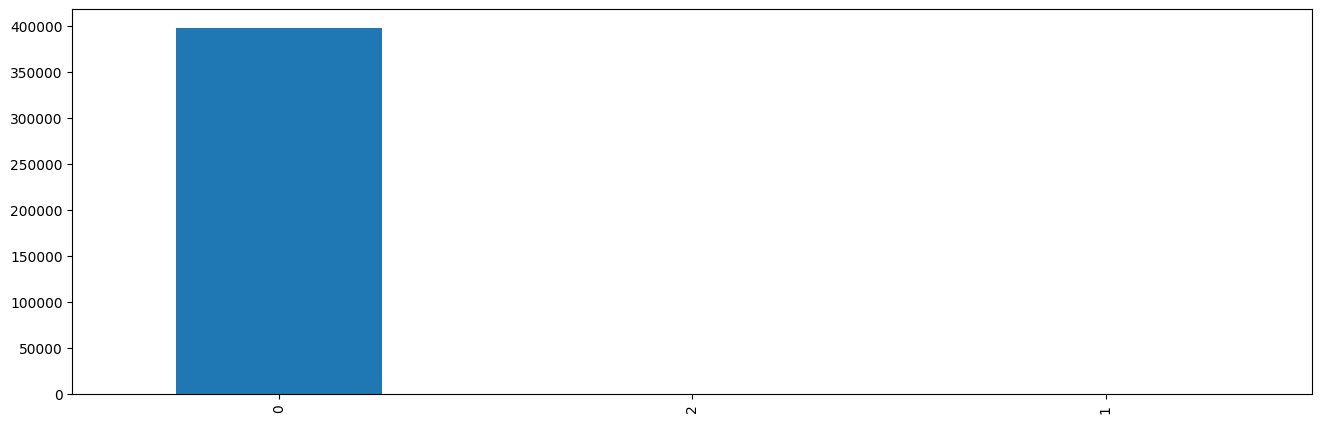

In [ ]:
segment_counts = data['segment'].value_counts()
print("Segmentation Results:")
print(segment_counts)

segment_labels = ['Segment 1', 'Segment 2', 'Segment 3']
segment_counts.plot(kind='bar', x=segment_labels)



---



---

